In [631]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (12, 8),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [645]:
#Cleaning the data

#load data into data frame
king_county_df = pd.read_csv("data/King_County_House_prices_dataset.csv")
#filled the NaN as 0 becasue they were only on the view and waterfront columns and it made more sense than deleting the rows 
king_county_df = king_county_df.fillna(0)
#sqft_basement was type object and had some "?" as values so I replaced the entire column for sqft_living - sqft_above
king_county_df['sqft_basement'] = king_county_df['sqft_living'] - king_county_df['sqft_above']
#changed columns to more apropriate data types
king_county_df['date'] = pd.to_datetime(king_county_df['date'])
king_county_df['date'] = king_county_df['date'].dt.to_period('M')
king_county_df['date'] = king_county_df['date'].astype(str)
king_county_df.waterfront = king_county_df.waterfront.astype(int)
king_county_df.view = king_county_df.view.astype(int)
king_county_df.yr_renovated = king_county_df.yr_renovated.astype(int)
#adding a column telling weather its renovated or not
king_county_df["is_renov"] = king_county_df.yr_renovated > 2000
#5 price bins
king_county_df["5_price_bins"] = pd.cut(king_county_df.price, [0, 298900, 399900, 519000, 701000, 7800000])


king_county_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.007,0.233,3.410,7.658,1788.597,291.725,1971.000,68.758,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.082,0.765,0.651,1.173,827.760,442.668,29.375,364.037,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


(array([ 308.,  544.,  390.,  477.,  809.,  354.,  446.,  789., 1296.,
        1414., 1597., 1339.,  976., 1829., 1187., 1395., 1189., 1667.,
        2350., 1241.]),
 array([1900.  , 1905.75, 1911.5 , 1917.25, 1923.  , 1928.75, 1934.5 ,
        1940.25, 1946.  , 1951.75, 1957.5 , 1963.25, 1969.  , 1974.75,
        1980.5 , 1986.25, 1992.  , 1997.75, 2003.5 , 2009.25, 2015.  ]),
 <BarContainer object of 20 artists>)

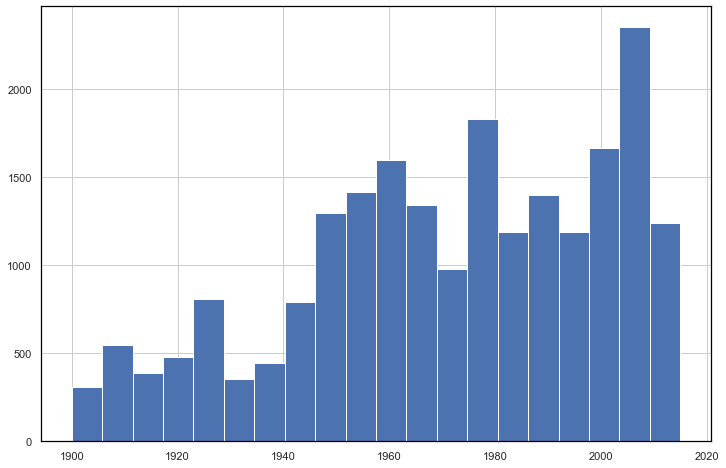

In [651]:
plt.hist(king_county_df.yr_built, bins=20)

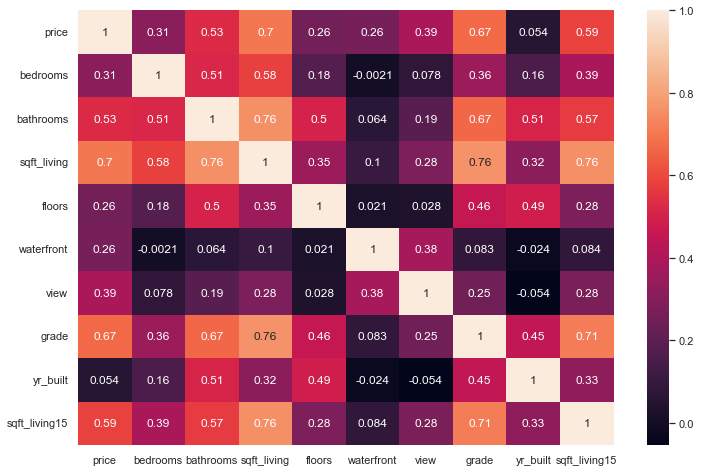

In [633]:
king_county_df_corr = king_county_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
                                      'view', 'grade', 'yr_built', 'sqft_living15']]
correlation_mat = king_county_df_corr.corr()
sns.heatmap(correlation_mat, annot=True)
plt.show()

In [665]:
#king_county_df.groupby(['waterfront', 'is_renov', 'grade']).count().reset_index()
kc_waterfront_df = king_county_df[king_county_df.waterfront == 1]

data = kc_waterfront_df.groupby('grade').mean().reset_index()
kc_waterfront_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renov,5_price_bins
49,822039084,2015-03,1350000.000,3,2.500,2753,65005,1.000,1,2,...,588,1953,0,98070,47.404,-122.451,2680,72513,False,"(701000, 7800000]"
230,8096000060,2015-04,655000.000,2,1.750,1450,15798,2.000,1,4,...,220,1915,1978,98166,47.450,-122.375,2030,13193,False,"(519000, 701000]"
246,2025069065,2014-09,2400000.000,4,2.500,3650,8354,1.000,1,4,...,1820,2000,0,98074,47.634,-122.072,3120,18841,False,"(701000, 7800000]"
264,2123039032,2014-10,369900.000,1,0.750,760,10079,1.000,1,4,...,0,1936,0,98070,47.468,-122.438,1230,14267,False,"(298900, 399900]"
300,3225069065,2014-06,3080000.000,4,5.000,4550,18641,1.000,1,4,...,1950,2002,0,98074,47.605,-122.077,4550,19508,False,"(701000, 7800000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2025069140,2015-03,1900000.000,3,2.500,2830,4334,3.000,1,4,...,0,2006,0,98074,47.632,-122.071,2830,38211,False,"(701000, 7800000]"
20309,518500480,2014-08,3000000.000,3,3.500,4410,10756,2.000,1,4,...,980,2014,0,98056,47.528,-122.205,3550,5634,False,"(701000, 7800000]"
20751,8043700105,2015-04,2300000.000,4,4.000,4360,8175,2.500,1,4,...,420,2007,0,98008,47.572,-122.104,2670,8525,False,"(701000, 7800000]"
21185,518500460,2014-10,2230000.000,3,3.500,3760,5634,2.000,1,4,...,930,2014,0,98056,47.529,-122.205,3560,5762,False,"(701000, 7800000]"


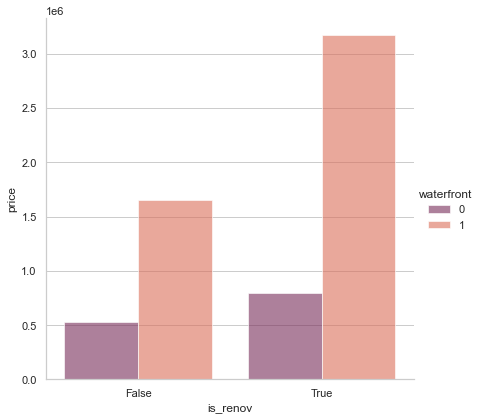

In [677]:
# set plot style: grey grid in the background:
sns.set(style="whitegrid")

g = sns.catplot(
    data=king_county_df, kind="bar",
    x="is_renov", y="price", hue="waterfront",
    ci=None, palette="rocket", alpha=.6, height=6,
)

In [635]:
for_map_zips = king_county_df.groupby('zipcode').mean().reset_index()
for_map_zips1 = king_county_df.groupby('zipcode').median().reset_index()


for_map_zips.describe()

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,is_renov
count,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000,...,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000
mean,98077.300,4493975003.950,561010.927,3.372,2.120,2098.820,18321.192,1.487,0.008,0.250,...,7.667,1805.733,293.087,1970.007,76.508,47.554,-122.211,1993.806,15366.949,0.017
std,56.622,756393253.007,302394.017,0.270,0.303,434.646,21855.641,0.201,0.023,0.234,...,0.611,421.792,133.635,15.030,63.903,0.138,0.151,398.682,17124.533,0.016
min,98001.000,2802980843.950,234284.035,2.778,1.433,1468.625,3194.368,1.160,0.000,0.000,...,6.509,1188.272,78.387,1940.406,0.000,47.211,-122.464,1361.230,3303.500,0.000
25%,98029.250,4131647761.623,354133.935,3.196,1.911,1784.766,6260.391,1.345,0.000,0.076,...,7.282,1476.984,184.818,1956.933,30.236,47.456,-122.321,1692.081,5997.663,0.005
50%,98067.500,4433061346.081,492001.209,3.371,2.100,2033.363,10564.538,1.459,0.000,0.178,...,7.553,1718.422,291.805,1970.407,49.726,47.560,-122.240,1923.885,9657.653,0.011
75%,98117.750,4903922324.191,645532.226,3.520,2.289,2313.551,17337.001,1.621,0.007,0.363,...,8.017,2059.481,400.034,1981.344,110.649,47.669,-122.134,2203.740,13659.649,0.025
max,98199.000,7390800180.081,2161300.000,4.060,3.200,3800.900,102735.438,1.990,0.171,1.094,...,9.560,3290.900,632.504,1997.980,358.720,47.755,-121.759,3132.200,80068.214,0.060


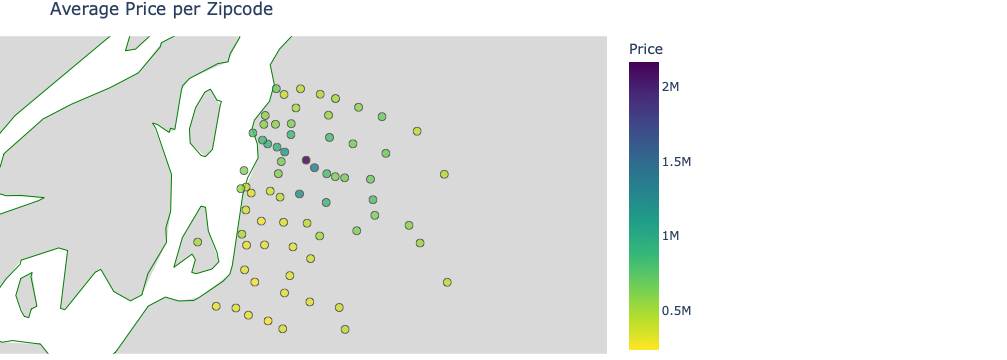

In [636]:
lat_foc = 47.560
lon_foc = -122.214

fig = go.Figure(data=go.Scattergeo(lon = for_map_zips['long'], lat = for_map_zips['lat'],
                                   text = for_map_zips['price'],marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'viridis',
            cmin = for_map_zips['price'].min(),
            color = for_map_zips['price'],
            cmax = for_map_zips['price'].max(),
            colorbar_title="Price"
        )))

fig.update_geos(resolution=50, scope="usa", center=dict(lat=lat_foc, lon=lon_foc), showcountries=False,
                landcolor = "rgb(217, 217, 217)", projection_scale=45,
                showsubunits=True, subunitcolor="Green", showland = True, projection_type='albers usa')

fig.update_layout(title = 'Average Price per Zipcode', height=300, margin={"r":400,"t":30,"l":0,"b":0})


fig.show()

Text(0.5, 1.0, 'Sales during the Months')

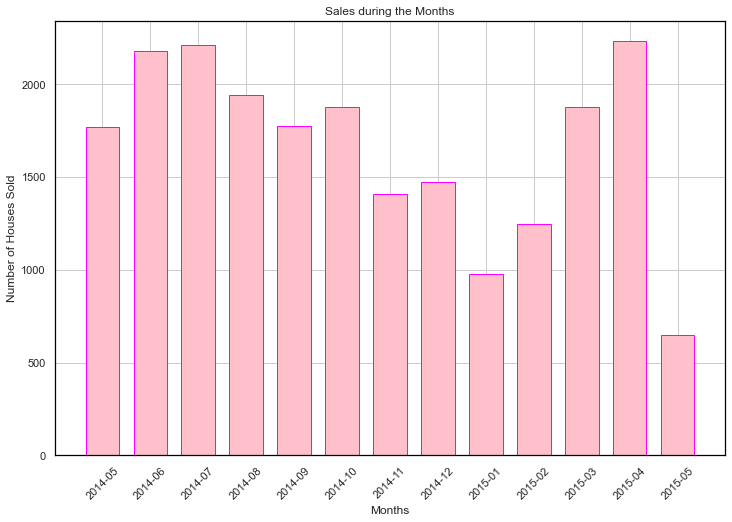

In [653]:
#number of houses sold per month
king_county_df1 = king_county_df.sort_values(by=['date'])
height = king_county_df1.groupby('date').count()

plt.xticks(rotation=45)
plt.bar(x=king_county_df1['date'].unique(), height=height.price, width = 0.7, color="pink", edgecolor= "magenta")
plt.xlabel("Months")
plt.ylabel("Number of Houses Sold")
plt.title("Sales during the Months")

In [652]:
renovated_houses = king_county_df[king_county_df.yr_renovated>0]
#3.4 percent of the houses are renovated
waterfront_houses = king_county_df[king_county_df.waterfront==1]